Saving Screenshot 2025-02-09 182903.png to Screenshot 2025-02-09 182903 (1).png
Image uploaded successfully.


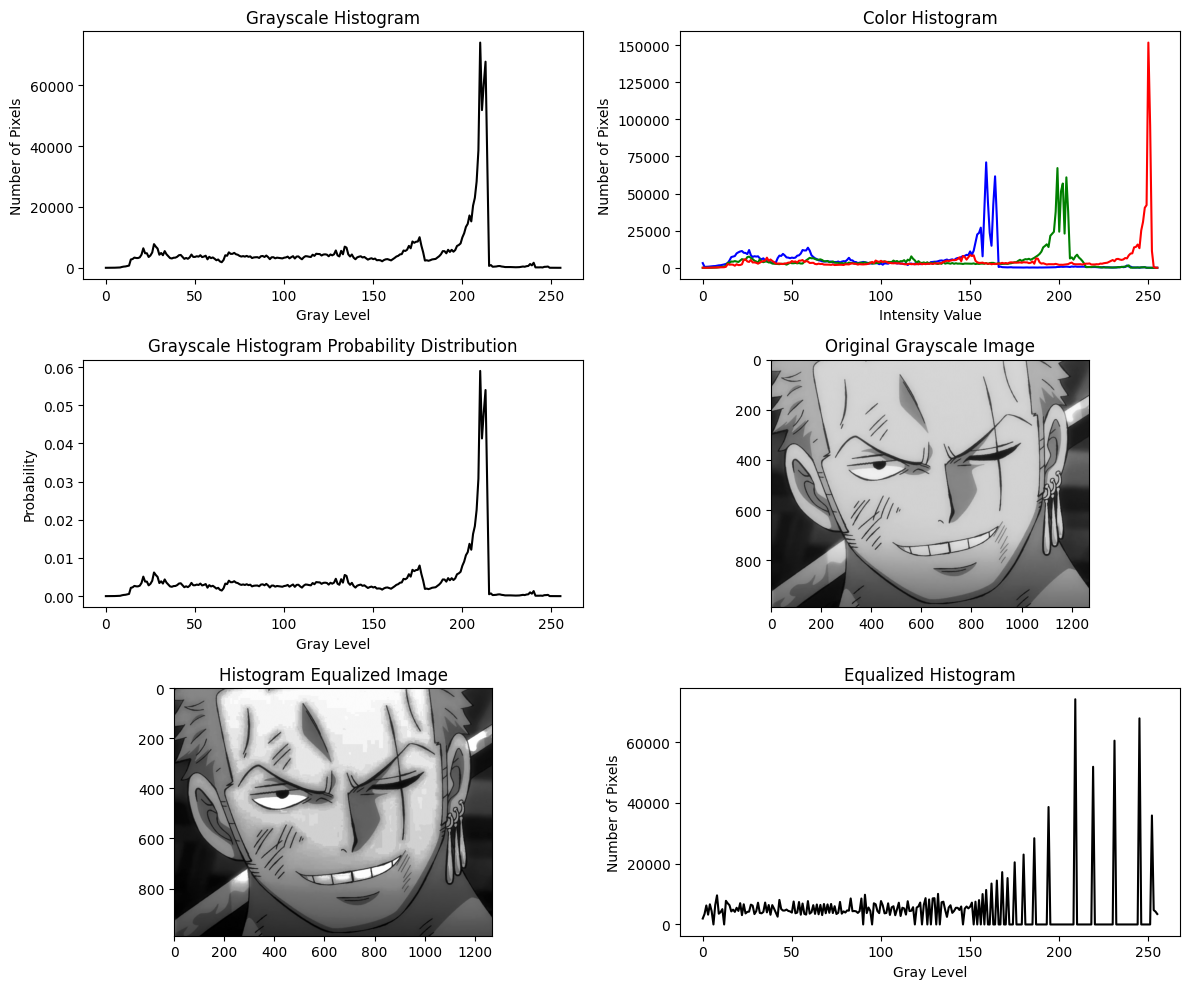

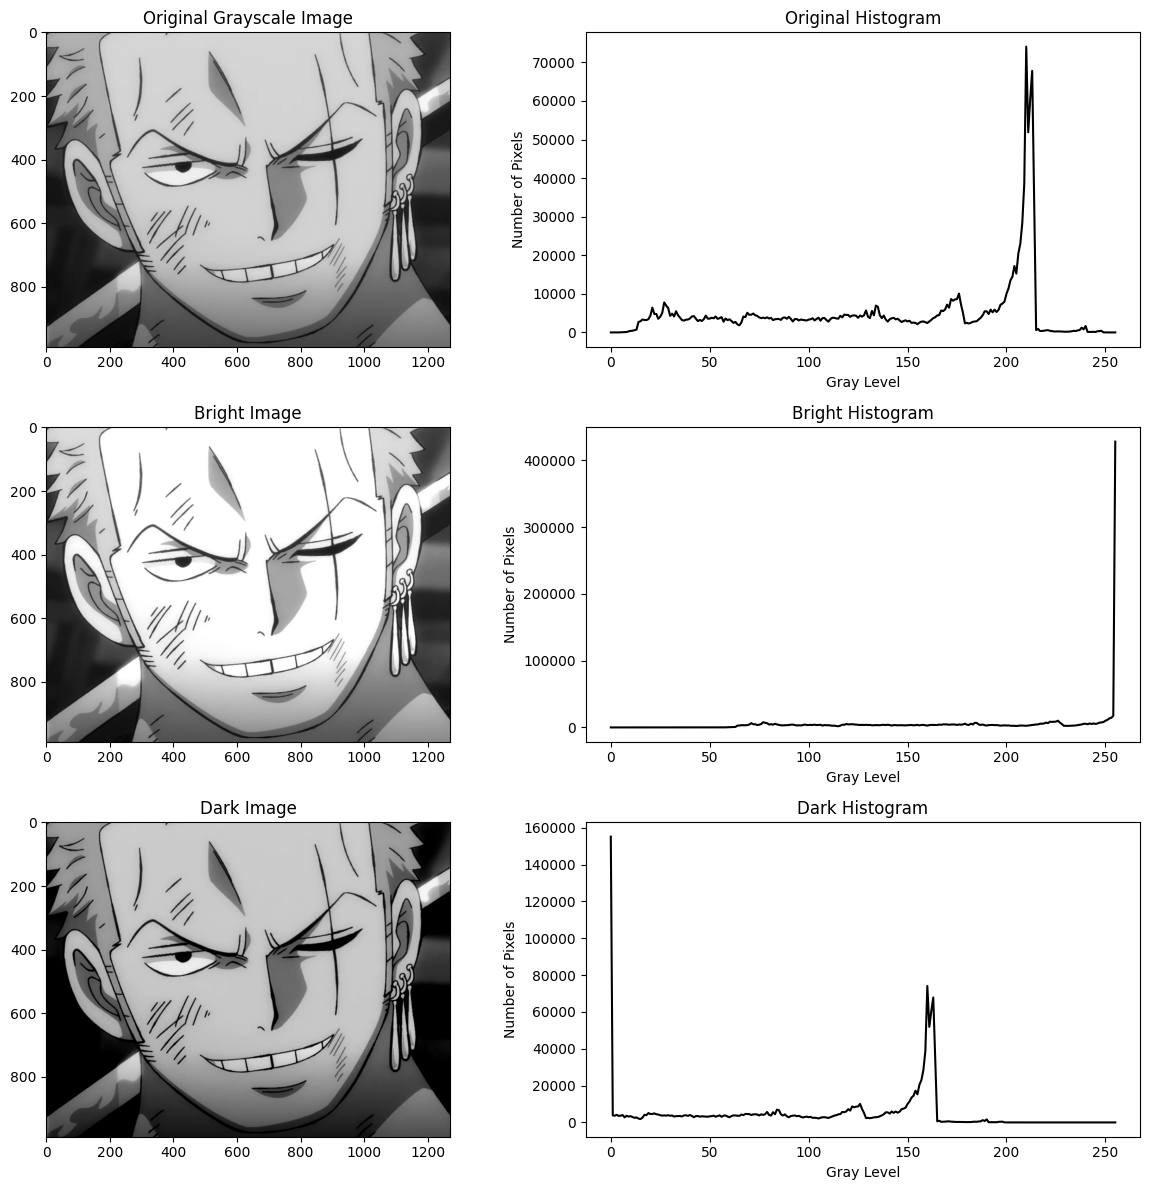

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

colors = ('b', 'g', 'r')
hist_color = {color: cv2.calcHist([img], [i], None, [256], [0, 256]) for i, color in enumerate(colors)}

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.title("Grayscale Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.plot(hist_gray, color='black')

plt.subplot(3, 2, 2)
plt.title("Color Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Number of Pixels")
for color, hist in hist_color.items():
    plt.plot(hist, color=color)

hist_gray_prob = hist_gray / hist_gray.sum()

plt.subplot(3, 2, 3)
plt.title("Grayscale Histogram Probability Distribution")
plt.xlabel("Gray Level")
plt.ylabel("Probability")
plt.plot(hist_gray_prob, color='black')

equalized_gray = cv2.equalizeHist(gray)

hist_eq = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

plt.subplot(3, 2, 4)
plt.title("Original Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(3, 2, 5)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_gray, cmap='gray')

plt.subplot(3, 2, 6)
plt.title("Equalized Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.plot(hist_eq, color='black')

plt.tight_layout()
plt.show()

bright_img = cv2.add(gray, 50)
dark_img = cv2.subtract(gray, 50)

hist_bright = cv2.calcHist([bright_img], [0], None, [256], [0, 256])
hist_dark = cv2.calcHist([dark_img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(3, 2, 2)
plt.title("Original Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.plot(hist_gray, color='black')

plt.subplot(3, 2, 3)
plt.title("Bright Image")
plt.imshow(bright_img, cmap='gray')

plt.subplot(3, 2, 4)
plt.title("Bright Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.plot(hist_bright, color='black')

plt.subplot(3, 2, 5)
plt.title("Dark Image")
plt.imshow(dark_img, cmap='gray')

plt.subplot(3, 2, 6)
plt.title("Dark Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.plot(hist_dark, color='black')

plt.tight_layout()
plt.show()


Saving Screenshot 2025-02-09 182903.png to Screenshot 2025-02-09 182903 (2).png
Image uploaded successfully.


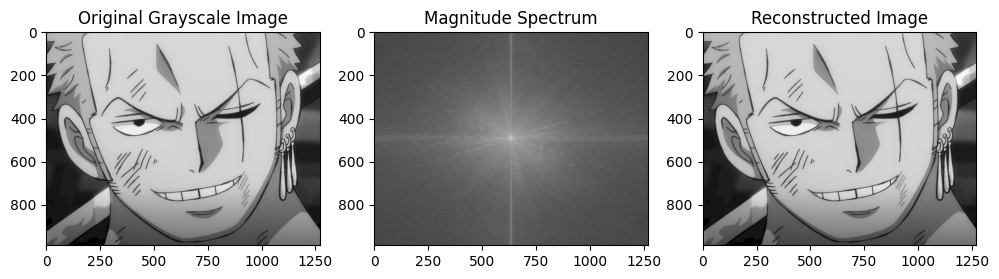

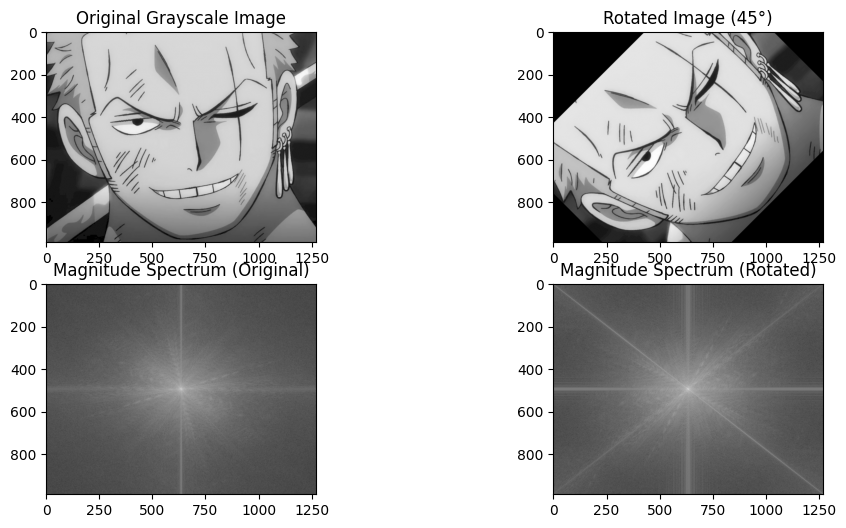

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

idft_shift = np.fft.ifftshift(dft_shift)
img_reconstructed = np.fft.ifft2(idft_shift)
img_reconstructed = np.abs(img_reconstructed)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(img_reconstructed, cmap='gray')

plt.show()

angle = 45
(h, w) = img.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

dft_rot = np.fft.fft2(rotated_img)
dft_rot_shift = np.fft.fftshift(dft_rot)
magnitude_spectrum_rot = 20 * np.log(np.abs(dft_rot_shift) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Rotated Image (45°)")
plt.imshow(rotated_img, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Magnitude Spectrum (Original)")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Magnitude Spectrum (Rotated)")
plt.imshow(magnitude_spectrum_rot, cmap='gray')

plt.show()
